In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda num:'%1.3f'%num)
pd.set_option('display.max_columns', 99)

In [2]:
train = pd.read_csv("../input/odsc-europe/train.csv")
test = pd.read_csv('../input/odsc-europe/test.csv')

## Simple Exploratory data analysis (EDA)

Keeping in mind the (undisclosed) challenge rules, we convert the `IsWeekend` column to `bool` datatype.

In [3]:
train['IsWeekend'] = train['IsWeekend'].astype(bool)
train.head()

,UniqueId,SocialMedia,SocialMediaTime,News,NewsTime,Blogs,BlogsTime,BounceRate,ExitRate,PageValue,TrafficKind,OS,Browser,Month,Region,VisitorKind,DayImportance,IsWeekend,IsSale
0,000x41,3.000,87.833,0.000,0.000,27.000,798.333,0.000,0.013,22.916,search,windows,Google-Chrome,Feb,East North Central,Returning,0.800,False,True
1,000x4c,10.000,1005.667,0.000,0.000,36.000,2111.342,0.004,0.014,11.439,direct,windows,Other,Feb,New England,Returning,0.000,False,True
2,000x65,4.000,61.000,0.000,0.000,19.000,607.000,0.000,0.027,17.536,referral,android,Safari,Feb,West South Central,Returning,1.000,True,True
3,000xc6,0.000,0.000,0.000,0.000,17.000,840.233,0.000,0.002,109.176,direct,windows,Google-Chrome,Mar,Pacific,New,0.000,False,True
4,000xc7,3.000,94.000,2.000,125.000,55.000,1970.845,0.000,0.002,96.255,direct,windows,Firefox,Mar,New England,New,0.000,True,True


It is beneficial to see, at this stage, the shape of our datasets.

In [4]:
print('Original shape of train dataset:', train.shape)
print('Original shape of test dataset:', test.shape)

Original shape of train dataset: (2908, 19)
Original shape of test dataset: (1000, 18)


In [5]:
# Obtain the number of unique values in the columns
train.nunique(axis=0)

UniqueId           2908
SocialMedia          27
SocialMediaTime    1210
News                 12
NewsTime            482
Blogs               225
BlogsTime          2643
BounceRate           89
ExitRate            128
PageValue          1264
TrafficKind           4
OS                    5
Browser               5
Month                10
Region                9
VisitorKind           3
DayImportance         6
IsWeekend             2
IsSale                2
dtype: int64

In [6]:
train.describe()

,SocialMedia,SocialMediaTime,News,NewsTime,Blogs,BlogsTime,BounceRate,ExitRate,PageValue,DayImportance
count,2900.000,2889.000,2892.000,2898.000,2893.000,2901.000,2891.000,2892.000,2891.000,2893.000
mean,2.694,94.281,0.607,41.423,37.617,69062.541,0.016,0.034,14.110,0.045
std,3.566,184.294,1.326,144.907,50.334,2628346.866,0.039,0.041,27.794,0.173
min,-20.000,0.000,0.000,-1001.000,0.000,-2000056.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,10.000,284.700,0.000,0.012,0.000,0.000
50%,1.000,27.000,0.000,0.000,22.000,794.993,0.001,0.021,0.000,0.000
75%,4.000,115.000,1.000,0.000,44.000,1758.250,0.012,0.038,17.829,0.000
max,27.000,2720.500,12.000,1767.667,584.000,100099000.000,0.200,0.200,360.953,1.000


We see some problems:
* SocialMedia represents the number of social media pages visited by an user. This *cannot be negative*.
* NewsTime represents the time spent visting news websites. This, too, *cannot be negative*.
* BlogsTime *definitely has some outliers*.

So, let us remove those outliers from our `train` dataset.

In [7]:
train = train[train.SocialMedia >= 0]
train = train[train.NewsTime >= 0]

We are going to check the highest and lowest values of the `BlogsTime` column, just to see the outliers.

In [8]:
train.sort_values(by = ['BlogsTime'], ascending = False).head(3)

,UniqueId,SocialMedia,SocialMediaTime,News,NewsTime,Blogs,BlogsTime,BounceRate,ExitRate,PageValue,TrafficKind,OS,Browser,Month,Region,VisitorKind,DayImportance,IsWeekend,IsSale
2644,0x11e1,0.000,0.000,0.000,0.000,19.000,100099000.000,0.011,0.025,0.000,NaN,windows,Firefox,May,New England,Returning,NaN,False,False
885,0x2250,20.000,1307.675,3.000,132.667,517.000,27009.859,0.004,0.015,8.403,direct,android,Safari,Nov,New England,Returning,0.000,False,True
2503,0x2074,27.000,853.736,2.000,126.500,584.000,24844.156,0.002,0.009,4.511,referral,windows,Firefox,Nov,East North Central,Returning,0.000,False,False


In [9]:
train.sort_values(by = ['BlogsTime']).head(3)

,UniqueId,SocialMedia,SocialMediaTime,News,NewsTime,Blogs,BlogsTime,BounceRate,ExitRate,PageValue,TrafficKind,OS,Browser,Month,Region,VisitorKind,DayImportance,IsWeekend,IsSale
1750,00xfd4,5.000,79.000,NaN,12.000,54.000,-2000056.000,0.005,0.025,NaN,referral,windows,Google-Chrome,May,NaN,Returning,0.400,False,False
1138,0x28c1,1.000,22.750,0.000,0.000,1.000,0.000,0.000,0.067,0.000,referral,android,Safari,Dec,New England,New,0.000,False,True
2534,0x10fd,0.000,0.000,0.000,0.000,9.000,0.000,0.120,0.160,0.000,direct,windows,Google-Chrome,May,New England,Returning,0.600,False,False


In [10]:
# Remove the outliers
index_down = train[(train.BlogsTime < 0)].index
train.drop(index_down, inplace = True)

index_up = train[(train.BlogsTime > 27010)].index
train.drop(index_up, inplace = True)

In [11]:
print('New shape of train dataset after dropping outliers:', train.shape)

New shape of train dataset after dropping outliers: (2879, 19)


This means that 29 rows have been deleted. Let us see the updated `train` dataset's characteristics.

In [12]:
train.describe()

,SocialMedia,SocialMediaTime,News,NewsTime,Blogs,BlogsTime,BounceRate,ExitRate,PageValue,DayImportance
count,2879.000,2864.000,2869.000,2879.000,2867.000,2877.000,2868.000,2868.000,2866.000,2872.000
mean,2.707,94.323,0.606,42.270,37.478,1431.765,0.016,0.034,14.153,0.044
std,3.508,184.932,1.325,143.777,49.877,2010.383,0.039,0.041,27.887,0.172
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,10.000,284.783,0.000,0.011,0.000,0.000
50%,1.000,26.200,0.000,0.000,22.000,794.993,0.001,0.021,0.000,0.000
75%,4.000,114.500,1.000,0.000,44.000,1754.000,0.012,0.038,17.835,0.000
max,27.000,2720.500,12.000,1767.667,584.000,27009.859,0.200,0.200,360.953,1.000


Even `Blogs` contains some high values. The following code cell, however, tells us that `BlogsTime` is also significantly high for these measurements. Hence, these are genuine values and not outliers.

In [13]:
train.sort_values(by = ['Blogs'], ascending = False).head()

,UniqueId,SocialMedia,SocialMediaTime,News,NewsTime,Blogs,BlogsTime,BounceRate,ExitRate,PageValue,TrafficKind,OS,Browser,Month,Region,VisitorKind,DayImportance,IsWeekend,IsSale
2503,0x2074,27.000,853.736,2.000,126.500,584.000,24844.156,0.002,0.009,4.511,referral,windows,Firefox,Nov,East North Central,Returning,0.000,False,False
1118,0x284e,9.000,444.285,0.000,0.000,534.000,18504.126,0.011,0.023,2.548,direct,windows,Google-Chrome,Nov,East North Central,Returning,0.000,True,True
885,0x2250,20.000,1307.675,3.000,132.667,517.000,27009.859,0.004,0.015,8.403,direct,android,Safari,Nov,New England,Returning,0.000,False,True
1301,0x2cf9,2.000,9.000,4.000,31.000,401.000,12433.219,0.007,0.022,0.000,direct,windows,Google-Chrome,Nov,New England,Returning,0.000,False,True
1197,0x2a3f,5.000,41.700,1.000,114.000,401.000,14568.162,0.007,0.020,3.546,search,windows,Google-Chrome,Nov,West North Central,Returning,0.000,False,True


## Visual Exploratory data analysis

Let us plot a correlation heatmap expressing the relationships between the variables in `train`.

Text(0.5, 1.0, 'Correlation Heatmap')

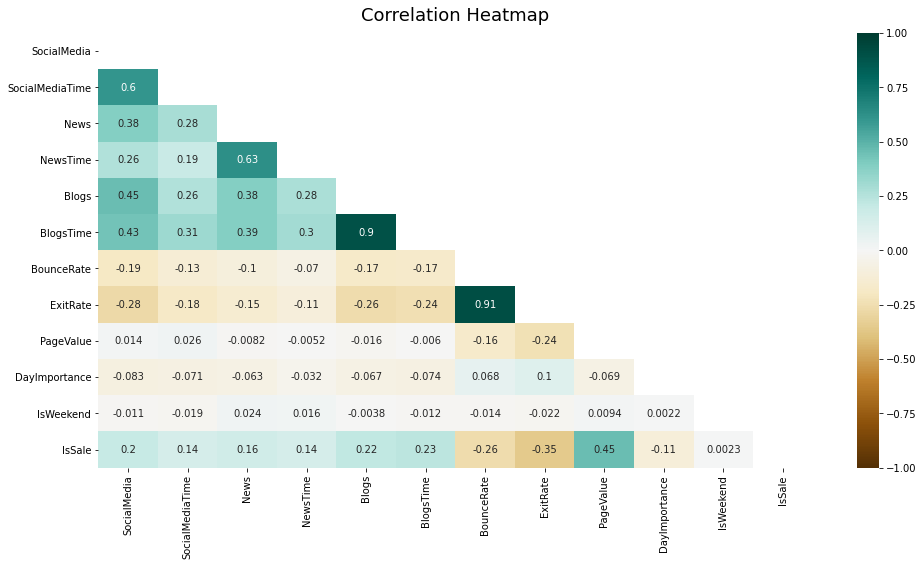

In [14]:
plt.figure(figsize = (16, 8))

#Use triu() to isolate upper triangle of matrix 
#while turning all values in the lower triangle to 0
mask = np.triu(np.ones_like(train.corr(), dtype = np.bool))

heatmap = sns.heatmap(train.corr(), vmin = -1, vmax = 1, cmap = 'BrBG', mask = mask, annot = True)

heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize': 18}, pad = 12)

We can make some observations:
1. There is a *positive correlation* between PageValue and IsSale - one, I believe, is warranted.
2. *Negative correlations* between:
    * IsSale and BounceRate; 
    * IsSale and ExitRate; and
    * PageValue and ExitRate are to be expected.
3. There is a **high positive correlation** between BounceRate and ExitRate.  

4. *Positive correlations* between:
    * SocialMedia and SocialMediaTime;
    * News and NewsTime are to be expected.
5. But, there is a **high positive correlation** between Blogs and BlogsTime.

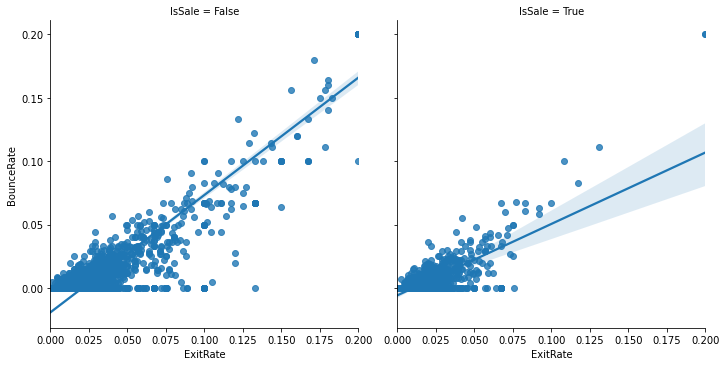

In [15]:
plot1 = sns.lmplot(x = 'ExitRate', y ='BounceRate', col = 'IsSale', data = train)

**Observation 1:** A higher `BounceRate` and a higher `ExitRate` almost leads to no purchase , i.e, `IsSale = False`.

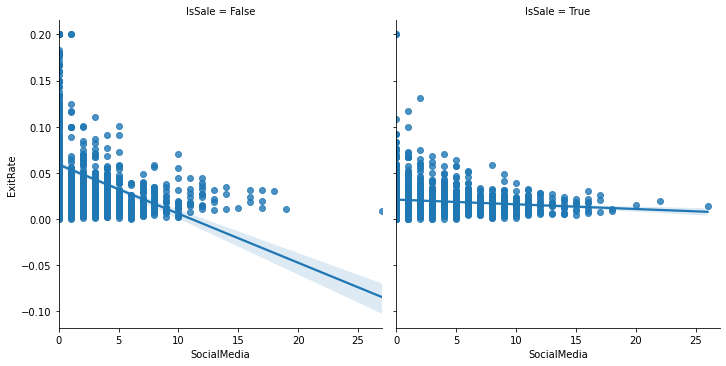

In [16]:
plot2 = sns.lmplot(x = 'SocialMedia', y = 'ExitRate', col = 'IsSale', data = train)

**Observation 2:** `SocialMedia`, i.e., the number of social media posts visited by the user, though negatively correlated with `ExitRate`, does seem to cause some consumers to buy the product and some not to buy.

<AxesSubplot:xlabel='Feature'>

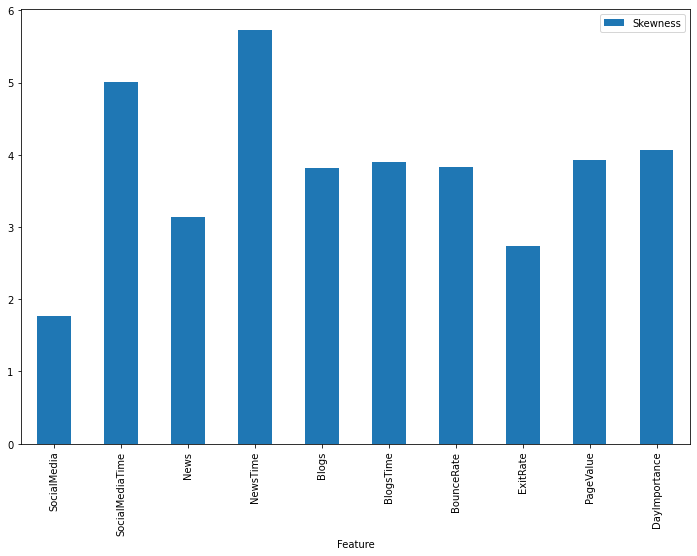

In [17]:
from scipy.stats import skew

skew = []
for i in train.select_dtypes(['number']).columns:
    skew.append(train[str(i)].skew())
    
skew_df = pd.DataFrame({'Feature': train.select_dtypes(['number']).columns, 'Skewness': skew})
skew_df.plot(x = 'Feature', y ='Skewness', kind = 'bar',figsize = (12,8))

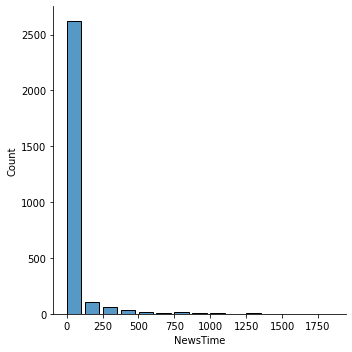

In [18]:
plot3 = sns.displot(train, x = 'NewsTime', shrink = .8, binwidth = 125)

**Observation 3:** The majority of the people don't spend much time reading the news.

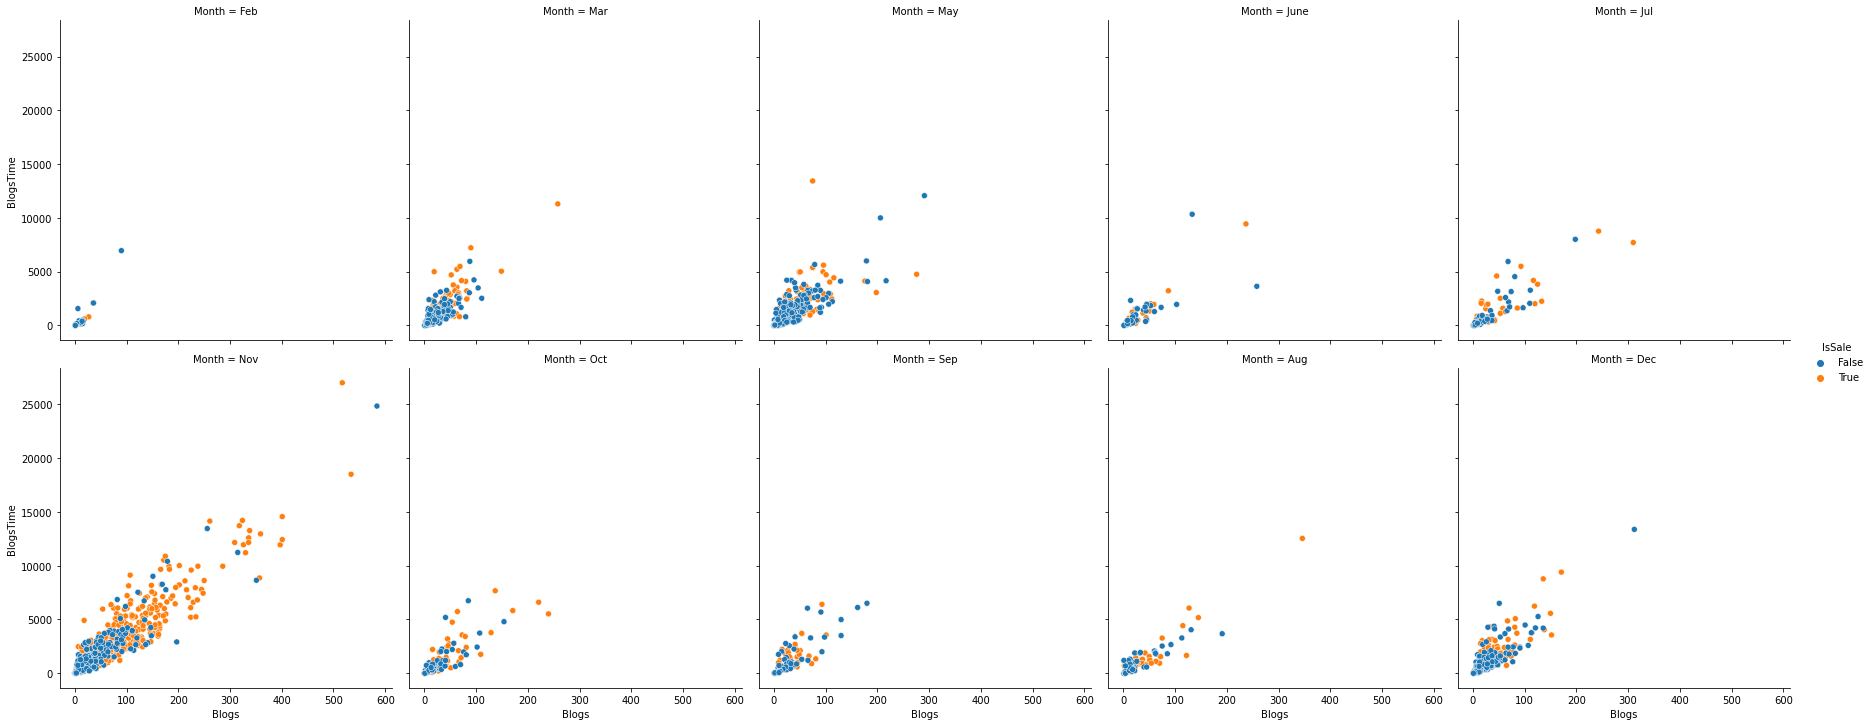

In [19]:
sns.relplot(data = train, x = 'Blogs', y = 'BlogsTime', hue = 'IsSale', col = 'Month', col_wrap = 5)

**Observation 4:** People spend a disproportionately high time visting blog pages and spending time on it in the month of November, possibly due to [Black Friday](https://en.wikipedia.org/wiki/Black_Friday_(shopping)).

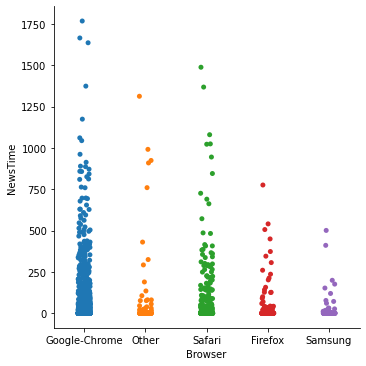

In [20]:
sns.catplot(x = 'Browser', y = 'NewsTime', data = train)

**Observation 5:** Because Google Chrome is shipped with Android phones and Safari with Apple phones, one can explain why these 2 browsers are primarily used for watching the news.

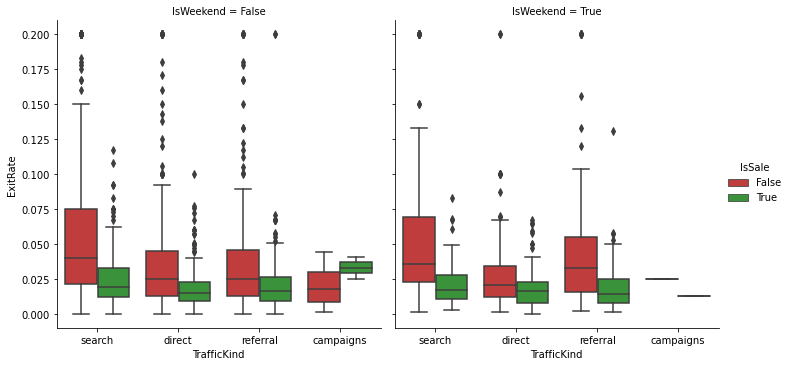

In [21]:
sns.catplot(x = 'TrafficKind', y = 'ExitRate', hue = 'IsSale', col = 'IsWeekend', kind = 'box', data = train, palette = {False: 'tab:red', True: 'tab:green'})

## Preprocessing the data

We are now going to perform an [one-hot encoding](https://www.kaggle.com/alexisbcook/categorical-variables) on the categorical variables in `train`.

In [22]:
from sklearn.preprocessing import OneHotEncoder

# The nominative (unordered) categorical features
features_nom = ['TrafficKind', 'OS', 'Browser', 'Month', 'Region', 'VisitorKind']

def encode(df):
    '''
    This function encodes features with its correct datatype.
    Specifically, we encode nominal categorical features.
    
    Parameters:
    df: A dataframe
    
    Returns:
    The encoded dataframe.
    '''     
    OH_encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
    OH_cols_df = pd.DataFrame(OH_encoder.fit_transform(df[features_nom]))
    
    # One-hot encoding removed index, put it back
    OH_cols_df.index = df.index
    
    # Give column names and change floats to int
    OH_cols_df.columns = OH_encoder.get_feature_names(features_nom)
    OH_cols_df = OH_cols_df.astype(int)
    
    # Remove the categorical columns (will replace it with one-hot encoding)
    df.drop(features_nom, axis = 1, inplace = True)
    
    # Add one-hot encoded columns to numerical features
    OH_df = pd.concat([df, OH_cols_df], axis = 1)
    return OH_df

# Apply encode to train & test datasets
train = encode(train)
test = encode(test)

In [23]:
def impute(df):
    '''
    This function imputes missing values.
    
    First, we get a list of all the columns with missing values and
    separate them into 2 lists: one having numerical features and
    the other with categorical features. We also get the columns with
    no missing values.
    
    Then, we create indicator columns with a 0 or 1 to indicate that
    the new value (0 for numerical columns and None for the rest) is
    created by the imputation process.
    
    Parameters:
    df: A dataframe
    
    Returns:
    The imputed dataframe.
    '''
    miss_value_cols = df.columns[df.isnull().any()].tolist()
    miss_value_cols_dtype = [(col, df.dtypes[col]) for col in miss_value_cols]
    
    miss_value_cols_num = [i for i, j in miss_value_cols_dtype if j == 'float64' or j == 'int64']
    miss_value_cols_categ = list(set(miss_value_cols) - set(miss_value_cols_num))
    non_miss_value_cols = list(set(list(df)) - set(miss_value_cols))
    
    df_temp = df[miss_value_cols].isnull().astype(int).add_suffix('_indicator')
    cols1 = non_miss_value_cols + [item for x in miss_value_cols for item in (x, x + '_indicator')]
    
    df.fillna({x: 0 for x in miss_value_cols_num}, inplace = True)
    df.fillna({y: 'None' for y in miss_value_cols_categ}, inplace = True)
    
    df_new = pd.concat([df, df_temp], axis = 1).reindex(cols1, axis = 'columns')
    return df_new

# Apply impute to train & test datasets
train = impute(train)
test = impute(test)

train.head()

,Region_West South Central,Month_Sep,Region_South Atlantic,IsWeekend,TrafficKind_nan,Month_June,Month_May,NewsTime,Region_West North Central,UniqueId,TrafficKind_direct,Browser_Google-Chrome,Region_Mid-Atlantic,Region_Mountain,OS_linux,Month_Feb,Month_Mar,Browser_Samsung,TrafficKind_campaigns,TrafficKind_referral,Month_Aug,Month_Nov,Region_Pacific,Region_nan,SocialMedia,OS_other,Month_nan,Browser_nan,Region_East South Central,OS_mac-ios,Region_East North Central,TrafficKind_search,Month_Dec,Browser_Other,VisitorKind_Other,IsSale,OS_nan,VisitorKind_New,Month_Oct,VisitorKind_Returning,VisitorKind_nan,Browser_Firefox,Region_New England,Month_Jul,Browser_Safari,OS_windows,OS_android,SocialMediaTime,SocialMediaTime_indicator,News,News_indicator,Blogs,Blogs_indicator,BlogsTime,BlogsTime_indicator,BounceRate,BounceRate_indicator,ExitRate,ExitRate_indicator,PageValue,PageValue_indicator,DayImportance,DayImportance_indicator
0,0,0,0,False,0,0,0,0.000,0,000x41,0,1,0,0,0,1,0,0,0,0,0,0,0,0,3.000,0,0,0,0,0,1,1,0,0,0,True,0,0,0,1,0,0,0,0,0,1,0,87.833,0,0.000,0,27.000,0,798.333,0,0.000,0,0.013,0,22.916,0,0.800,0
1,0,0,0,False,0,0,0,0.000,0,000x4c,1,0,0,0,0,1,0,0,0,0,0,0,0,0,10.000,0,0,0,0,0,0,0,0,1,0,True,0,0,0,1,0,0,1,0,0,1,0,1005.667,0,0.000,0,36.000,0,2111.342,0,0.004,0,0.014,0,11.439,0,0.000,0
2,1,0,0,True,0,0,0,0.000,0,000x65,0,0,0,0,0,1,0,0,0,1,0,0,0,0,4.000,0,0,0,0,0,0,0,0,0,0,True,0,0,0,1,0,0,0,0,1,0,1,61.000,0,0.000,0,19.000,0,607.000,0,0.000,0,0.027,0,17.536,0,1.000,0
3,0,0,0,False,0,0,0,0.000,0,000xc6,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0.000,0,0,0,0,0,0,0,0,0,0,True,0,1,0,0,0,0,0,0,0,1,0,0.000,0,0.000,0,17.000,0,840.233,0,0.000,0,0.002,0,109.176,0,0.000,0
4,0,0,0,True,0,0,0,125.000,0,000xc7,1,0,0,0,0,0,1,0,0,0,0,0,0,0,3.000,0,0,0,0,0,0,0,0,0,0,True,0,1,0,0,0,1,1,0,0,1,0,94.000,0,2.000,0,55.000,0,1970.845,0,0.000,0,0.002,0,96.255,0,0.000,0


In [24]:
print('New shape of train dataset:', train.shape)
print('New shape of test dataset:', test.shape)

New shape of train dataset: (2879, 63)
New shape of test dataset: (1000, 65)


### Establish baseline

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def score_dataset(X, y, model = LogisticRegression(solver = 'saga', max_iter = 500)):
    '''
    This function establishes a baseline score to judge our
    feature engineering against.
        
    Parameters:
    X: The input variables
    y: The target variable
    model: Model for scoring
    
    Returns:
    The ROC-AUC Score.
    ''' 
    score = cross_val_score(model, X, y, cv=5, scoring="roc_auc")
    score = score.mean()
    return score

X = train.drop(['UniqueId'], axis = 1).copy()
y = X.pop("IsSale")

baseline_score = score_dataset(X, y)
print(f"Baseline score: {baseline_score:.5f} ROC-AUC")

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Baseline score: 0.84833 ROC-AUC


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


## Feature Utility scores

Let us use mutual information to compute utility scores for our features. This will give us an indication of how much potential the feature has.

In [26]:
from sklearn.feature_selection import mutual_info_classif
def make_mi_scores(X, y):
    '''
    This function creates the mutual information scores.
    
    Parameters:
    X: The input variables
    y: The target variable
    
    Returns:
    The mutual information scores
    '''
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have int dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_classif(X, y, discrete_features = discrete_features, random_state = 5)
    mi_scores = pd.Series(mi_scores, name = "MI Scores", index = X.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores

In [27]:
def plot_mi_scores(scores):
    '''
    Plot a horizontal barplot of the mutual information scores
    obtained from the make_mi_scores function.
    
    Parameters:
    scores: The mutual information scores
    '''
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    for i, v in enumerate(scores):
        plt.text(v, i, " "+str(round(v, 4)), color='blue', va='center')

In [28]:
X = train.drop(['UniqueId'], axis = 1).copy()
y = X.pop("IsSale")

mi_scores = make_mi_scores(X, y)
mi_scores

PageValue                   0.280
ExitRate                    0.083
BlogsTime                   0.077
BounceRate                  0.056
Blogs                       0.056
                             ... 
Browser_Google-Chrome       0.000
OS_nan                      0.000
Region_Pacific              0.000
Region_West South Central   0.000
Browser_Firefox             0.000
Name: MI Scores, Length: 61, dtype: float64

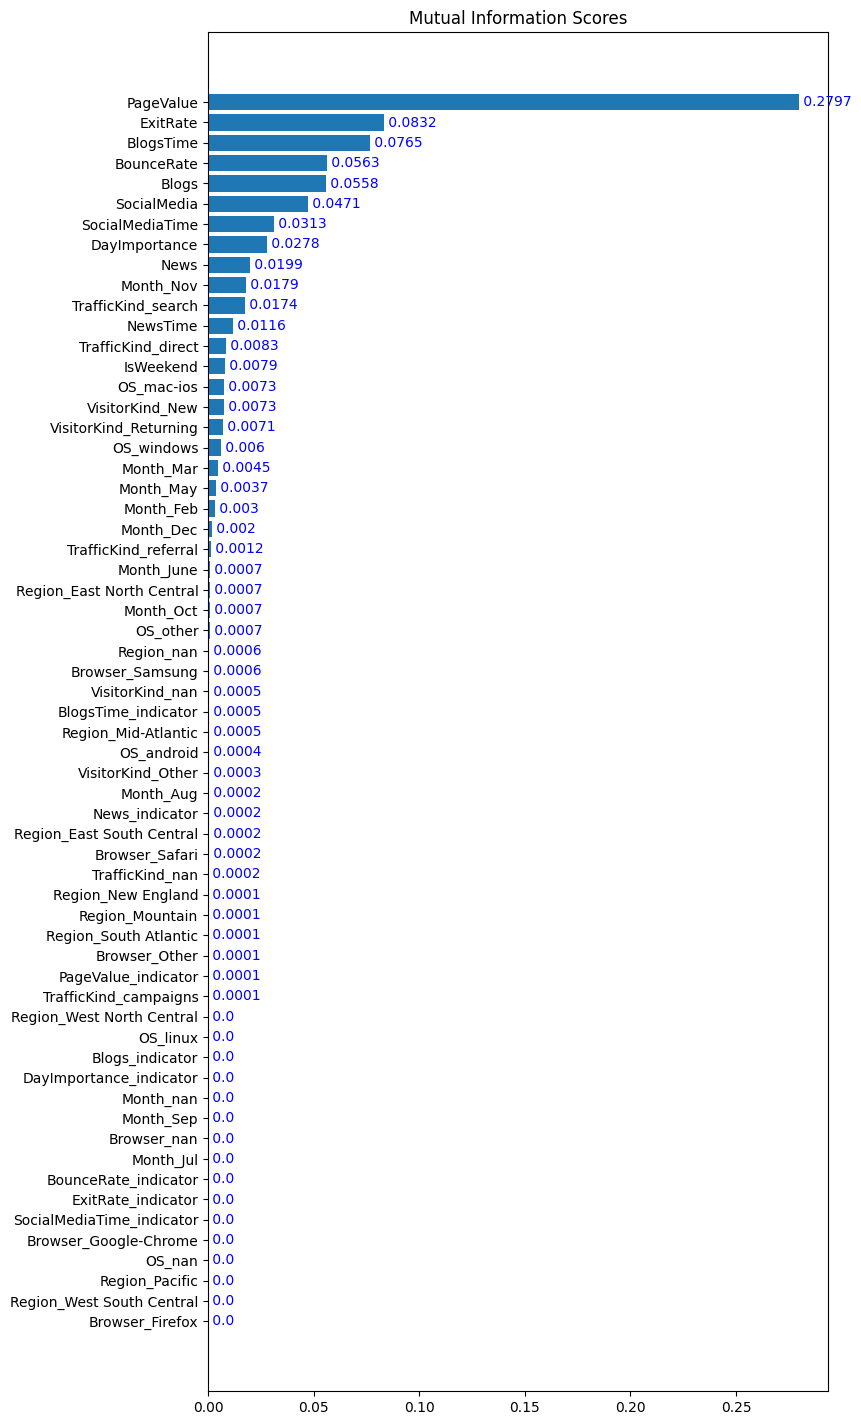

In [29]:
plt.figure(dpi = 100, figsize = (8, 18))
plot_mi_scores(mi_scores)

You can see that we have a few features that are informative but many don't seem to be informative at all (at least by themselves). Because the top scoring features will usually pay-off the most during feature development, so it could be a good idea to focus our efforts on those. On the other hand, training on uninformative features can lead to overfitting. So, the features with scores < 0.001 we'll drop entirely:

In [30]:
X = train.drop(['UniqueId'], axis = 1).copy()
y = X.pop("IsSale")

inform = mi_scores[mi_scores > 0.001]
inform_cols = inform.index.tolist()
X = X[inform_cols]

X.head()

,PageValue,ExitRate,BlogsTime,BounceRate,Blogs,SocialMedia,SocialMediaTime,DayImportance,News,Month_Nov,TrafficKind_search,NewsTime,TrafficKind_direct,IsWeekend,OS_mac-ios,VisitorKind_New,VisitorKind_Returning,OS_windows,Month_Mar,Month_May,Month_Feb,Month_Dec,TrafficKind_referral
0,22.916,0.013,798.333,0.000,27.000,3.000,87.833,0.800,0.000,0,1,0.000,0,False,0,0,1,1,0,0,1,0,0
1,11.439,0.014,2111.342,0.004,36.000,10.000,1005.667,0.000,0.000,0,0,0.000,1,False,0,0,1,1,0,0,1,0,0
2,17.536,0.027,607.000,0.000,19.000,4.000,61.000,1.000,0.000,0,0,0.000,0,True,0,0,1,0,0,0,1,0,1
3,109.176,0.002,840.233,0.000,17.000,0.000,0.000,0.000,0.000,0,0,0.000,1,False,0,1,0,1,1,0,0,0,0
4,96.255,0.002,1970.845,0.000,55.000,3.000,94.000,0.000,2.000,0,0,125.000,1,True,0,1,0,1,1,0,0,0,0


In [31]:
X1 = test.drop(['UniqueId'], axis = 1).copy()
X1 = X1[inform_cols]
X1.head()

,PageValue,ExitRate,BlogsTime,BounceRate,Blogs,SocialMedia,SocialMediaTime,DayImportance,News,Month_Nov,TrafficKind_search,NewsTime,TrafficKind_direct,IsWeekend,OS_mac-ios,VisitorKind_New,VisitorKind_Returning,OS_windows,Month_Mar,Month_May,Month_Feb,Month_Dec,TrafficKind_referral
0,7.481,0.004,884.500,0.000,25.000,5.000,277.800,0.000,0.000,0,0,0.000,1,1.000,0,1,0,1,0,0,0,0,0
1,2.627,0.015,1967.780,0.004,60.000,7.000,190.438,0.000,0.000,0,0,0.000,0,1.000,1,0,1,0,0,0,0,1,1
2,0.000,0.060,586.000,0.000,5.000,0.000,0.000,0.000,0.000,1,0,0.000,0,1.000,0,0,1,1,0,0,0,0,1
3,25.827,0.020,1986.553,0.005,54.000,2.000,88.000,0.000,10.000,0,0,719.000,1,0.000,0,0,1,0,0,0,0,1,0
4,22.458,0.005,3215.173,0.000,118.000,12.000,1276.264,0.000,0.000,1,1,0.000,0,0.000,1,0,1,0,0,0,0,0,0


In [32]:
score_dataset(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

0.8482913834504335

## Creating features

Attributes related to time spent by user:
* SocialMediaTime
* NewsTime
* BlogsTime

In [33]:
X['TotalTime'] = X.SocialMediaTime + X.NewsTime + X.BlogsTime
X1['TotalTime'] = X1.SocialMediaTime + X1.NewsTime + X1.BlogsTime

Attributes related to number of web pages seen by user:
* SocialMedia
* News
* Blogs

In [34]:
X['TotalPages'] = X.SocialMedia + X.News + X.Blogs
X1['TotalPages'] = X1.SocialMedia + X1.News + X1.Blogs

In [35]:
# Attribute combining whether the day of importance was on (or) near a weekend:
X['WeekendImportance'] = X.IsWeekend * X.DayImportance
X1['WeekendImportance'] = X1.IsWeekend * X1.DayImportance

In [36]:
X.head()

,PageValue,ExitRate,BlogsTime,BounceRate,Blogs,SocialMedia,SocialMediaTime,DayImportance,News,Month_Nov,TrafficKind_search,NewsTime,TrafficKind_direct,IsWeekend,OS_mac-ios,VisitorKind_New,VisitorKind_Returning,OS_windows,Month_Mar,Month_May,Month_Feb,Month_Dec,TrafficKind_referral,TotalTime,TotalPages,WeekendImportance
0,22.916,0.013,798.333,0.000,27.000,3.000,87.833,0.800,0.000,0,1,0.000,0,False,0,0,1,1,0,0,1,0,0,886.166,30.000,0.000
1,11.439,0.014,2111.342,0.004,36.000,10.000,1005.667,0.000,0.000,0,0,0.000,1,False,0,0,1,1,0,0,1,0,0,3117.009,46.000,0.000
2,17.536,0.027,607.000,0.000,19.000,4.000,61.000,1.000,0.000,0,0,0.000,0,True,0,0,1,0,0,0,1,0,1,668.000,23.000,1.000
3,109.176,0.002,840.233,0.000,17.000,0.000,0.000,0.000,0.000,0,0,0.000,1,False,0,1,0,1,1,0,0,0,0,840.233,17.000,0.000
4,96.255,0.002,1970.845,0.000,55.000,3.000,94.000,0.000,2.000,0,0,125.000,1,True,0,1,0,1,1,0,0,0,0,2189.845,60.000,0.000


In [37]:
ids = test['UniqueId']
y = train['IsSale']

In [38]:
print(X.shape)
print(X1.shape)

(2879, 26)
(1000, 26)


### Scaling the data

From the scikit-learn website:

> `QuantileTransformer` applies a non-linear transformation such that the probability density function of each feature will be mapped to a uniform or Gaussian distribution. In this case, all the data, including outliers, will be mapped to a uniform distribution with the range $[0, 1]$, making outliers indistinguishable from inliers.

> `RobustScaler` and QuantileTransformer are robust to outliers in the sense that adding or removing outliers in the training set will yield approximately the same transformation. But contrary to RobustScaler, QuantileTransformer will also automatically collapse any outlier by setting them to the a priori defined range boundaries (0 and 1). This can result in saturation artifacts for extreme values.

> To map to a Gaussian distribution, set the parameter `output_distribution='normal'`.

In [39]:
from sklearn.preprocessing import QuantileTransformer

transformer = QuantileTransformer(output_distribution = 'normal')
transformer.fit(X)

train_scaled = transformer.transform(X)
test_scaled = transformer.transform(X1)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train_scaled, y, test_size = 0.25, random_state = 1, stratify = y)

## Modelling

### LogisticRegression

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'saga', penalty = 'l1', warm_start = True,
                        random_state = 5, C = 1, max_iter = 500)

score_dataset(X_train, y_train, model = lr)

#yhat_lr = lr.predict_proba(X_test)[:, 1]
#roc_auc_lr = roc_auc_score(y_test, yhat_lr)
#print('ROC-AUC using Logistic Regression:', roc_auc_lr)

0.9201256732764875

### DecisionTree classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, random_state = 5)
score_dataset(X_train, y_train, model = tree)

#yhat_tree = tree.predict_proba(X_test)[:, 1]
#roc_auc_tree = roc_auc_score(y_test, yhat_tree)
#print('ROC-AUC using Decision Tree:', roc_auc_tree)

0.8973778879278054

### (Gaussian) Naive Bayes - [with calibration](https://scikit-learn.org/stable/modules/calibration.html)

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV

gnb = GaussianNB()
gnb_sigmoid = CalibratedClassifierCV(gnb, cv = 5, method = 'isotonic')
score_dataset(X_train, y_train, model = gnb_sigmoid)

#yhat_NB = gnb_sigmoid.predict_proba(X_test)[:, 1]
#roc_auc_NB = roc_auc_score(y_test, yhat_NB)
#print('ROC-AUC score using (Gaussian) Naive Bayes:', roc_auc_NB)

0.8695325033016795

### Final submission

In [44]:
lr.fit(X_train, y_train)
IsSale_pred = lr.predict_proba(test_scaled)[:, 1]
submission = {'UniqueId': ids, 'IsSale': IsSale_pred}
df_submission = pd.DataFrame(submission)
df_submission.head()

,UniqueId,IsSale
0,0x1de1,0.953
1,0x21eb,0.672
2,0x2f6a,0.360
3,0x25f0,0.827
4,0x2be0,0.959


In [45]:
df_submission.to_csv('Submission.csv', index = True)